<a href="https://colab.research.google.com/github/18K41A0524/NNDL/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a simple linear regression using MBGD

In [2]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()
xa = [0.2,0.4,0.6,0.8,1.0,1.2]
ya = [3.4,3.8,4.2,4.6,5.0,5.4]

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')

#step 1 initialise values
bs = 2
m1 = 1.0 
c1 = -1.0  #variable x, y
itr = 1000  #epoches
learning_rate = 0.1  #learning rate

ns = len(xa)
nb = ns//bs
ms = ns%bs


for i in range(0,itr):
    for k in range(0,nb):
        dfmv1 = 0
        dfcv1 = 0
        for j in range(0,bs):
            index = k*bs + j
            #step 2 substitute x ,y in first order derivatives df/dx, df/dy
            m = symbols('m')
            c = symbols('c')
            x = symbols('x')
            y = symbols('y')
            dfmv = dfm.subs(m, m1) 
            dfmv = dfmv.subs(c, c1) 
            dfmv = dfmv.subs(x, xa[index]) 
            dfmv = dfmv.subs(y, ya[index]) 
            dfmv = round(dfmv,2)
            dfcv = dfc.subs(c, c1) 
            dfcv = dfcv.subs(m, m1) 
            dfcv = dfcv.subs(x, xa[index]) 
            dfcv = dfcv.subs(y, ya[index]) 
            dfcv = round(dfcv,2)
            dfmv1 += dfmv
            dfcv1 += dfcv
            
        dfmv1 = dfmv1/bs
        dfcv1 = dfcv1/bs

        dfmv1 = round(dfmv1,2)
        dfcv1 = round(dfcv1,2)
        #step3 find change in x , y
        dm = (-1.0)*learning_rate*dfmv1
        dc = (-1.0)*learning_rate*dfcv1
        #step4 update variable 
        m1 = m1 + dm 
        c1 = c1 + dc
        #step5 increment iterations 
        #step6 break loop if iterations exceed no of epoches
k = nb
if(ms>0):
    dfmv1 = 0
    dfcv1 = 0
    for j in range(0,ms):
        index = k*bs + j
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, xa[index]) 
        dfmv = dfmv.subs(y, ya[index]) 
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, xa[index]) 
        dfcv = dfcv.subs(y, ya[index]) 
        dfmv1 += dfmv
        dfcv1 += dfcv

    dfmv1 = dfmv1/ms
    dfcv1 = dfcv1/ms

    #step3 find change in x , y
    dm = (-1.0)*learning_rate*dfmv1
    dc = (-1.0)*learning_rate*dfcv1
    #step4 update variable 
    m1 = m1 + dm 
    c1 = c1 + dc
#step7 print variable x1, y1
m1= round(m1,2)
c1= round(c1,2)
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
2.01 2.99
minimum value obtained at m = 2.01 ,c =2.99 for given function


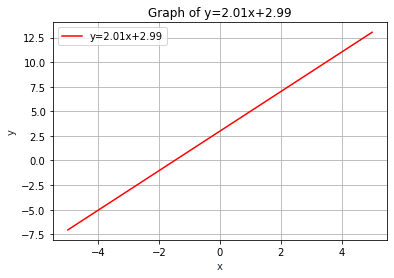

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = m1*x+c1
plt.plot(x, y, '-r', label='y='+str(m1)+'x+'+str(c1))
plt.title('Graph of '+'y='+str(m1)+'x+'+str(c1))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [4]:
data_pred = []
for i in xa:
    data_pred.append(m1*i+c1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ya,data_pred)
print(f"mean square error : {mse}")

mean square error : 1.9709269205729168e-05
